In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df=pd.read_csv('train.csv')
xtrain = df[df.columns[range(1,2501)]]
print(xtrain)
ytrain = df[df.columns[-1]]
df1=pd.read_csv('validation.csv')
xval = df1[df.columns[range(1,2501)]]
yval = df1[df.columns[-1]]

             0         1         2  ...      2497      2498      2499
0     0.081854  0.162635  0.277852  ...  0.233160  0.246771  0.255128
1     0.102432  0.153893  0.206869  ...  0.005638  0.000022  0.000000
2     0.015708  0.103597  0.198936  ...  0.017765  0.000117  0.001420
3     0.179396  0.239438  0.307044  ...  0.016304  0.035330  0.043289
4     0.304027  0.241181  0.168301  ...  0.099308  0.002299  0.000000
...        ...       ...       ...  ...       ...       ...       ...
5211  0.001449  0.049044  0.169362  ...  0.037498  0.000521  0.000000
5212  0.361376  0.360008  0.406875  ...  0.065441  0.067729  0.074407
5213  0.097749  0.051935  0.078719  ...  0.403284  0.263492  0.146881
5214  0.173169  0.187989  0.224778  ...  0.100532  0.092137  0.103122
5215  0.037483  0.050916  0.119764  ...  0.038001  0.042875  0.056852

[5216 rows x 2500 columns]


In [4]:
print(xtrain.shape, xval.shape)

(5216, 2500) (16, 2500)


In [5]:
ytrain = ytrain.replace({'Normal': 0})
ytrain = ytrain.replace({'Pneumonia': 1})
ytrain

0       0
1       0
2       0
3       0
4       0
       ..
5211    1
5212    1
5213    1
5214    1
5215    1
Name: type, Length: 5216, dtype: int64

In [6]:
yval = yval.replace({'Normal': 0})
yval = yval.replace({'Pneumonia': 1})
yval

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: type, dtype: int64

In [7]:
model = Sequential()
model = Sequential([
    Dense(128, activation='relu', input_shape=(2500,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [8]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
hist = model.fit(xtrain,ytrain, batch_size=32, epochs=75,validation_data=(xval, yval))

Epoch 1/75
163/163 [==============================] - 2s 7ms/step - loss: 0.4489 - accuracy: 0.7966 - val_loss: 0.7895 - val_accuracy: 0.5625
Epoch 2/75
163/163 [==============================] - 1s 5ms/step - loss: 0.3082 - accuracy: 0.8729 - val_loss: 0.5535 - val_accuracy: 0.6875
Epoch 3/75
163/163 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.9005 - val_loss: 0.7752 - val_accuracy: 0.6875
Epoch 4/75
163/163 [==============================] - 1s 5ms/step - loss: 0.2226 - accuracy: 0.9132 - val_loss: 0.4886 - val_accuracy: 0.8125
Epoch 5/75
163/163 [==============================] - 1s 5ms/step - loss: 0.2027 - accuracy: 0.9199 - val_loss: 0.4149 - val_accuracy: 0.8125
Epoch 6/75
163/163 [==============================] - 1s 5ms/step - loss: 0.1859 - accuracy: 0.9235 - val_loss: 0.5062 - val_accuracy: 0.8125
Epoch 7/75
163/163 [==============================] - 1s 5ms/step - loss: 0.1689 - accuracy: 0.9327 - val_loss: 0.4105 - val_accuracy: 0.8125
Epoch 

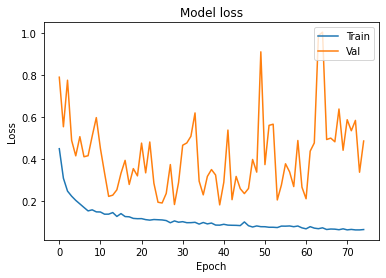

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

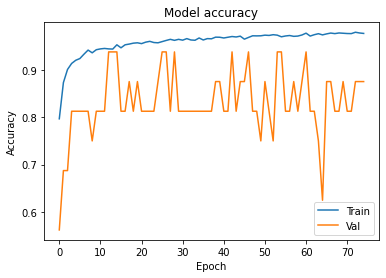

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [12]:
model.evaluate(xval,yval)


1/1 [==============================] - 0s 40ms/step - loss: 0.4855 - accuracy: 0.8750


[0.4855048656463623, 0.875]

In [14]:
model = Sequential()
model = Sequential([
    Dense(128, activation='relu', input_shape=(2500,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain, batch_size=32, epochs=75,validation_data=(xval, yval))

Epoch 1/75
163/163 [==============================] - 3s 9ms/step - loss: 0.4699 - accuracy: 0.7757 - val_loss: 1.3571 - val_accuracy: 0.5000
Epoch 2/75
163/163 [==============================] - 1s 5ms/step - loss: 0.3399 - accuracy: 0.8616 - val_loss: 1.4983 - val_accuracy: 0.5000
Epoch 3/75
163/163 [==============================] - 1s 6ms/step - loss: 0.2723 - accuracy: 0.8863 - val_loss: 0.5649 - val_accuracy: 0.8125
Epoch 4/75
163/163 [==============================] - 2s 10ms/step - loss: 0.2134 - accuracy: 0.9155 - val_loss: 0.2982 - val_accuracy: 0.8750
Epoch 5/75
163/163 [==============================] - 1s 6ms/step - loss: 0.1921 - accuracy: 0.9281 - val_loss: 0.2690 - val_accuracy: 0.8750
Epoch 6/75
163/163 [==============================] - 1s 6ms/step - loss: 0.1829 - accuracy: 0.9317 - val_loss: 0.4717 - val_accuracy: 0.8125
Epoch 7/75
163/163 [==============================] - 1s 5ms/step - loss: 0.1710 - accuracy: 0.9327 - val_loss: 0.2921 - val_accuracy: 0.9375
Epoch

In [15]:
model.evaluate(xval,yval)

1/1 [==============================] - 0s 36ms/step - loss: 0.1994 - accuracy: 0.9375


[0.19941306114196777, 0.9375]

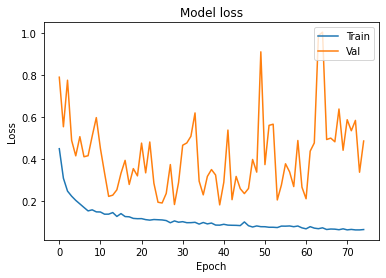

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

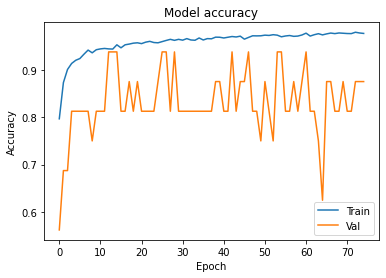

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
import pickle

In [19]:
pickle.dump(model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://66a97ff0-2b72-424b-bdd9-71fe712bc49d/assets
